# 08 Multiple Linear Regression & Polynomial Regression

# Sample Dataset

## Training Dataset

In [12]:
import pandas as pd

pizza = {
    'diameter': [6, 8, 10, 14, 18],
    'n_topping': [2, 1, 0, 2, 0],
    'price': [7, 9, 13, 17.5, 18],
}

train_pizaa_df = pd.DataFrame(pizza)
train_pizaa_df

,diameter,n_topping,price
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


## Testing Dataset

In [13]:
pizza = {
    'diameter': [8, 9, 11, 16, 21],
    'n_topping': [2, 0, 2, 2, 0],
    'harga': [11, 8.5, 15, 18, 11],
}

test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,diameter,n_topping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,21,0,11.0


## Preprocessing Dataset

In [14]:
import numpy as np

X_train = np.array(train_pizaa_df[['diameter', 'n_topping']])
y_train = np.array(train_pizaa_df['price'])

print(f'X_train: \n{X_train}\n')
print(f'y_train: {y_train}')

X_train: 
[[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]

y_train: [ 7.   9.  13.  17.5 18. ]


In [15]:
X_test = np.array(test_pizza_df[['diameter', 'n_topping']])
y_test = np.array(test_pizza_df['harga'])

print(f'X_test: \n{X_test}\n')
print(f'y_test: {y_test}')

X_test: 
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [21  0]]

y_test: [11.   8.5 15.  18.  11. ]


# Multiple Linear Regression

Multiple Linear Regression merupakan generalisasi dari Simple Linear Regression yang memunkinkan untuk menggunakan beberapa explanatory variables.


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'r_squared: {r2_score(y_test, y_pred)}')

r_squared: -1.4262210087783647


# Polynomial Regression

Polynomial Regression memodelkan hubungan antara independent variable X dan dependent variable Y sebagai derajat polymonial X.

## Preprocessing

In [17]:
X_train = np.array(train_pizaa_df['diameter']).reshape(-1, 1)
y_train = np.array(train_pizaa_df['price'])

print(f'X_train: \n{X_train}\n')
print(f'y_train: {y_train}')

X_train: 
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

y_train: [ 7.   9.  13.  17.5 18. ]


## Polynomial Regression: Quadratic

Polynomial Regression dengan derajat 2 (kuadratik) dapat digunakan untuk memodelkan hubungan non-linear antara variabel independen dan dependen.

### Polynomial Features

In [18]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)

print(f'X_train_quadratic: \n{X_train_quadratic}\n')

X_train_quadratic: 
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]



### Training Model

In [19]:
model = LinearRegression()
model.fit(X_train_quadratic, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Visualisasi Model

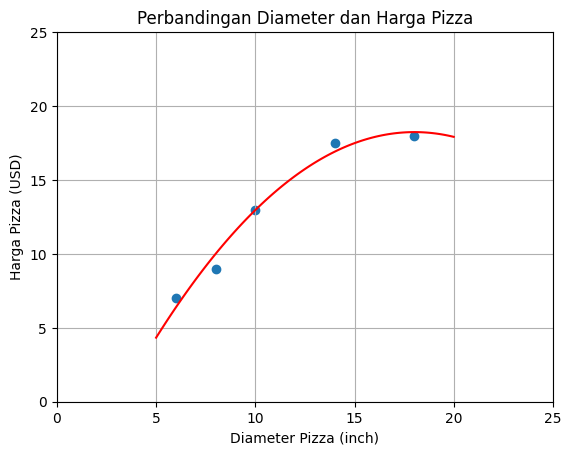

In [20]:
import matplotlib.pyplot as plt

X_vis = np.linspace(5, 20, 100).reshape(-1, 1)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)

plt.scatter(X_train, y_train)
plt.plot(X_vis, y_vis_quadratic, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter Pizza (inch)')
plt.ylabel('Harga Pizza (USD)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

### Polynomial Regression: Quadratic vs Cubic

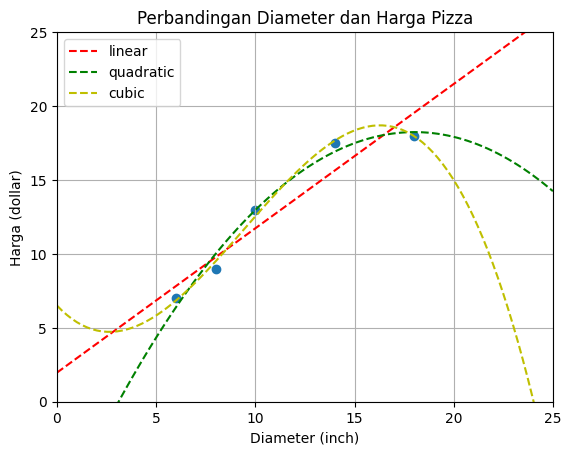

In [21]:
# Training Set
plt.scatter(X_train, y_train)

# Linear
model = LinearRegression()
model.fit(X_train, y_train)
X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
y_vis = model.predict(X_vis)
plt.plot(X_vis, y_vis, '--r', label='linear')

# Quadratic
quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_quadratic, y_train)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis = model.predict(X_vis_quadratic)
plt.plot(X_vis, y_vis, '--g', label='quadratic')

# Cubic
cubic_feature = PolynomialFeatures(degree=3)
X_train_cubic = cubic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_cubic, y_train)
X_vis_cubic = cubic_feature.transform(X_vis)
y_vis = model.predict(X_vis_cubic)
plt.plot(X_vis, y_vis, '--y', label='cubic')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.legend()
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()